# IML - P2

![15560369383553_2c2.jpg](input/15560369383553_2c2.jpg)

1. Select Data

2. Clean up Data

3. Transform Data


# Exploratory Data Analysis

## What's provided ?

### Target

Show representations of the dataset through univariate and multivariate analysis

main interesting feature are:
* nutriscore_score
* nutriscore_grade

### Size / Nb lines & columns

Data set contains 186 columns and approx 2Mio lignes

### Types of features / variables

it contains a mix of types : dates, strings, numbers

Interesting ones:

#### Qualitative
* countries_tags
* allergens
* traces
* additives
* pnns_groups_1 [explanation (fr)](https://solidarites-sante.gouv.fr/IMG/pdf/pnns4_2019-2023.pdf)
* pnns_groups_2
* nova_group [explanation (fr)](https://www.thierrysouccar.com/nutrition/info/nova-une-classification-des-aliments-basee-sur-la-science-3936)
* brand_owner ?
* main_category

#### Quantitative
* serving_size
* serving_quantity
* no_nutriments
* additives_n
* ingredients_from_palm_oil_n
* ingredients_that_may_be_from_palm_oil_n
* nutriscore_score
* nutriscore_grade
* ecoscore_score_fr
* ecoscore_grade_fr

Detailed variables :

* abcd_100g

### Missing values identification

What are the features which have lots of NaN / empty values ?


## What's in it ?

* Target visualisation (hist, boxplot)

* Features comprehension

* Features - target relations

* Outliers recognition

In [1]:
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
# os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask

# import pandas as pd
import modin.pandas as pd
import ray
ray.init(ignore_reinit_error=True)

from scipy import stats

> important notice : import is made with date type parsing sepcified for some columns, after preliminary analysis

# LOADING

![](assets/loading.png)


In [2]:
df = pd.read_csv('input/open-food-facts/en.openfoodfacts.org.products.csv', sep='\t', parse_dates=['created_datetime','last_modified_datetime'])

Data types of partitions are different! Please refer to the troubleshooting section of the Modin documentation to fix this issue.


In [3]:
df_bck = df.copy()

In [4]:
df = df_bck.copy()

In [5]:
df.shape

(1988476, 186)

In [6]:
# pd.set_option('display.max_columns', None)
df.head()


code                                                url  \
0     00000000000000225  http://world-en.openfoodfacts.org/product/0000...   
1  00000000000003429145  http://world-en.openfoodfacts.org/product/0000...   
2         0000000000017  http://world-en.openfoodfacts.org/product/0000...   
3         0000000000031  http://world-en.openfoodfacts.org/product/0000...   
4    000000000003327986  http://world-en.openfoodfacts.org/product/0000...   

          creator   created_t          created_datetime  last_modified_t  \
0  nutrinet-sante  1623855208 2021-06-16 14:53:28+00:00       1623855209   
1         kiliweb  1630483911 2021-09-01 08:11:51+00:00       1630484064   
2         kiliweb  1529059080 2018-06-15 10:38:00+00:00       1561463718   
3        isagoofy  1539464774 2018-10-13 21:06:14+00:00       1539464817   
4         kiliweb  1574175736 2019-11-19 15:02:16+00:00       1624390765   

     last_modified_datetime               product_name  \
0 2021-06-16 14:53:29+00:00             jeunes pousses   
1 2021-09-01 08:14:24+00:00                    L.casei   
2 2019-06-25 11:55:18+00:00           Vit√≥ria crackers   
3 2018-10-13 21:06:57+00:00                      Cacao   
4 2021-06-22 19:39:25+00:00  Filetes de pollo empanado   

   abbreviated_product_name generic_name  ...  \
0                       NaN          NaN  ...   
1                       NaN          NaN  ...   
2                       NaN          NaN  ...   
3                       NaN          NaN  ...   
4                       NaN          NaN  ...   

  carbon-footprint-from-meat-or-fish_100g  nutrition-score-fr_100g  \
0                                     NaN                      NaN   
1                                     NaN                      NaN   
2                                     NaN                      NaN   
3                                     NaN                      NaN   
4                                     NaN                      NaN   

   nutrition-score-uk_100g  glycemic-index_100g  water-hardness_100g  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   

   choline_100g  phylloquinone_100g  beta-glucan_100g  inositol_100g  \
0           NaN                 NaN               NaN            NaN   
1           NaN                 NaN               NaN            NaN   
2           NaN                 NaN               NaN            NaN   
3           NaN                 NaN               NaN            NaN   
4           NaN                 NaN               NaN            NaN   

   carnitine_100g  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 186 columns]

In [7]:
df.describe()

created_t  last_modified_t  cities  allergens_en  serving_quantity  \
count  1.988476e+06     1.988476e+06     0.0           0.0      4.975140e+05   
mean   1.560070e+09     1.595301e+09     NaN           NaN      2.233335e+16   
std    5.296541e+07     3.116836e+07     NaN           NaN      1.575269e+19   
min    1.328021e+09     1.333873e+09     NaN           NaN      0.000000e+00   
25%    1.524120e+09     1.582759e+09     NaN           NaN      2.800000e+01   
50%    1.571243e+09     1.599393e+09     NaN           NaN      5.300000e+01   
75%    1.603225e+09     1.619531e+09     NaN           NaN      1.133981e+02   
max    1.634172e+09     1.634172e+09     NaN           NaN      1.111111e+22   

       no_nutriments    additives_n  additives  ingredients_from_palm_oil_n  \
count            0.0  722441.000000        0.0                722441.000000   
mean             NaN       2.029187        NaN                     0.020294   
std              NaN       2.899762        NaN                     0.142943   
min              NaN       0.000000        NaN                     0.000000   
25%              NaN       0.000000        NaN                     0.000000   
50%              NaN       1.000000        NaN                     0.000000   
75%              NaN       3.000000        NaN                     0.000000   
max              NaN      49.000000        NaN                     3.000000   

       ingredients_from_palm_oil  ...  \
count                        0.0  ...   
mean                         NaN  ...   
std                          NaN  ...   
min                          NaN  ...   
25%                          NaN  ...   
50%                          NaN  ...   
75%                          NaN  ...   
max                          NaN  ...   

       carbon-footprint-from-meat-or-fish_100g  nutrition-score-fr_100g  \
count                             11867.000000            719224.000000   
mean                                615.324945                 9.103861   
std                                6082.140585                 8.842205   
min                                   0.049000               -15.000000   
25%                                 107.800000                 1.000000   
50%                                 328.500000                10.000000   
75%                                 614.200000                16.000000   
max                              656298.600000                40.000000   

       nutrition-score-uk_100g  glycemic-index_100g  water-hardness_100g  \
count                 8.000000             4.000000                  1.0   
mean                 13.875000            34.175000               9100.0   
std                   8.576338            15.620153                  NaN   
min                   1.000000            14.000000               9100.0   
25%                   8.250000            26.000000               9100.0   
50%                  15.500000            37.000000               9100.0   
75%                  22.000000            45.175000               9100.0   
max                  22.000000            48.700000               9100.0   

       choline_100g  phylloquinone_100g  beta-glucan_100g  inositol_100g  \
count     63.000000         1712.000000         38.000000      69.000000   
mean       3.238417            0.068921          3.278158       2.201766   
std       18.705382            1.826776          1.562956      12.669790   
min        0.000000            0.000000          0.400000       0.001350   
25%        0.056500            0.000008          2.450000       0.010000   
50%        0.073600            0.000023          3.600000       0.025000   
75%        0.125000            0.000096          4.000000       0.047000   
max      136.000000           54.000000          7.300000      75.000000   

       carnitine_100g  
count       39.000000  
mean         0.025676  
std          0.090002  
min          0.000800  
25%          0.007050  
50%          0.01

In [8]:
df.columns.size

186

# CLEANING

![](assets/data_cleaning.jpeg)


## Features Types

In [9]:
for col in range(0, df.columns.size):
    print(f'{df.columns[col]:<45} {str(df.dtypes[col]):>}')

code                                          object
url                                           object
creator                                       object
created_t                                     int64
created_datetime                              datetime64[ns, UTC]
last_modified_t                               int64
last_modified_datetime                        datetime64[ns, UTC]
product_name                                  object
abbreviated_product_name                      object
generic_name                                  object
quantity                                      object
packaging                                     object
packaging_tags                                object
packaging_text                                object
brands                                        object
brands_tags                                   object
categories                                    object
categories_tags                               object
categories_en         

<AxesSubplot:ylabel='None'>

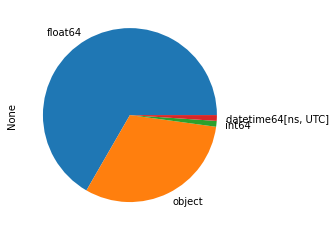

In [10]:
df.dtypes.value_counts().plot.pie()

## Investigate `int` and `date` values

In [11]:
df.columns[((df.dtypes != 'float') & (df.dtypes != 'object'))]

Index(['created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime'],
      dtype='object')

In [12]:
df.dtypes[['created_t','created_datetime','last_modified_t', 'last_modified_datetime']]

created_t                               int64
created_datetime          datetime64[ns, UTC]
last_modified_t                         int64
last_modified_datetime    datetime64[ns, UTC]
dtype: object

In [13]:
df[['created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime']]

created_t          created_datetime  last_modified_t  \
0        1623855208 2021-06-16 14:53:28+00:00       1623855209   
1        1630483911 2021-09-01 08:11:51+00:00       1630484064   
2        1529059080 2018-06-15 10:38:00+00:00       1561463718   
3        1539464774 2018-10-13 21:06:14+00:00       1539464817   
4        1574175736 2019-11-19 15:02:16+00:00       1624390765   
...             ...                       ...              ...   
1988471  1572513866 2019-10-31 09:24:26+00:00       1572513866   
1988472  1608105503 2020-12-16 07:58:23+00:00       1608105504   
1988473  1581171613 2020-02-08 14:20:13+00:00       1582644247   
1988474  1613129728 2021-02-12 11:35:28+00:00       1613129730   
1988475  1587222660 2020-04-18 15:11:00+00:00       1605558295   

           last_modified_datetime  
0       2021-06-16 14:53:29+00:00  
1       2021-09-01 08:14:24+00:00  
2       2019-06-25 11:55:18+00:00  
3       2018-10-13 21:06:57+00:00  
4       2021-06-22 19:39:25+00:00  
...                           ...  
1988471 2019-10-31 09:24:26+00:00  
1988472 2020-12-16 07:58:24+00:00  
1988473 2020-02-25 15:24:07+00:00  
1988474 2021-02-12 11:35:30+00:00  
1988475 2020-11-16 20:24:55+00:00  

[1988476 rows x 4 columns]

In [14]:
pd.to_datetime(df['created_t'], unit='s').head()

0   2021-06-16 14:53:28
1   2021-09-01 08:11:51
2   2018-06-15 10:38:00
3   2018-10-13 21:06:14
4   2019-11-19 15:02:16
Name: created_t, dtype: datetime64[ns]

we can see `created_t` and `created_datetime` represents the same but in different format. We choose to keep only one

In [15]:
df.drop({
    'created_t', 
    'last_modified_t', 
        }, axis=1, inplace=True)

## Cleaning unecessary data


### Remove empty columns 

let's compute the ratio: $ \frac{\text{empty values}}{\text{nb rows}} $

In [16]:
pd.set_option('display.max_rows', None)

To request implementation, send an email to feature_requests@modin.org.


<AxesSubplot:ylabel='Frequency'>

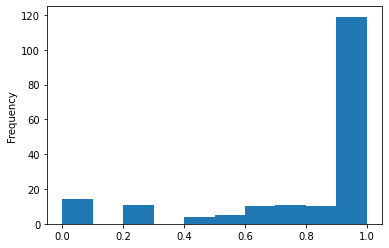

In [17]:
df.sample(round(df.shape[0]*0.02)).isna().mean().sort_values().plot(kind="hist")

About 120 out of 186 columns have more than 80% of empty cells. The dataset despite being large, is almost empty !

(apply_list_of_funcs pid=568760) 


<AxesSubplot:>

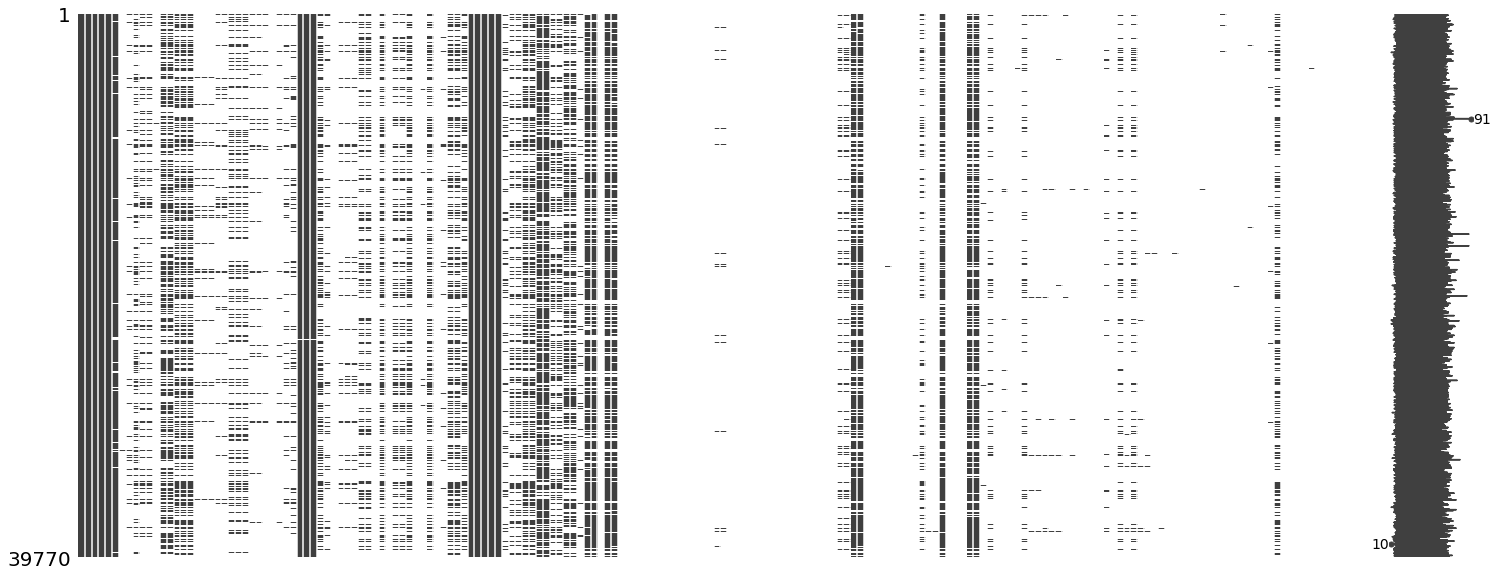

In [18]:
msno.matrix(df.sample(round(df.shape[0]*0.02)))

Taking a sample (20%) of the dataset, to ease compute, we can see there are some plateau of columns missing data, let's consider we want to remove at least those that have more than 70% of missing value.

In [19]:
threshold = 0.7
df = df[df.columns[df.isna().mean() < threshold]]

(apply_func pid=568784) 


### Remove not interesting columns

List remaining columns, remove the obviouses manually

#### Remove 'url' features


In [20]:
url_columns = df.filter(regex='url').columns.values
print(url_columns)
df = df.drop(url_columns, axis=1)

['url' 'image_url' 'image_small_url' 'image_ingredients_url'
 'image_ingredients_small_url' 'image_nutrition_url'
 'image_nutrition_small_url']


<AxesSubplot:ylabel='None'>

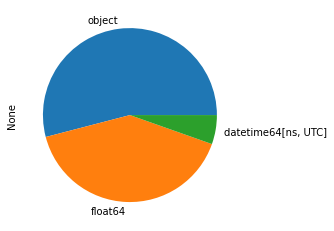

In [21]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:ylabel='Frequency'>

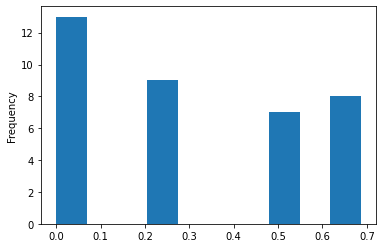

In [22]:
df.sample(round(df.shape[0]*0.02)).isna().mean().sort_values().plot(kind="hist")

<AxesSubplot:>

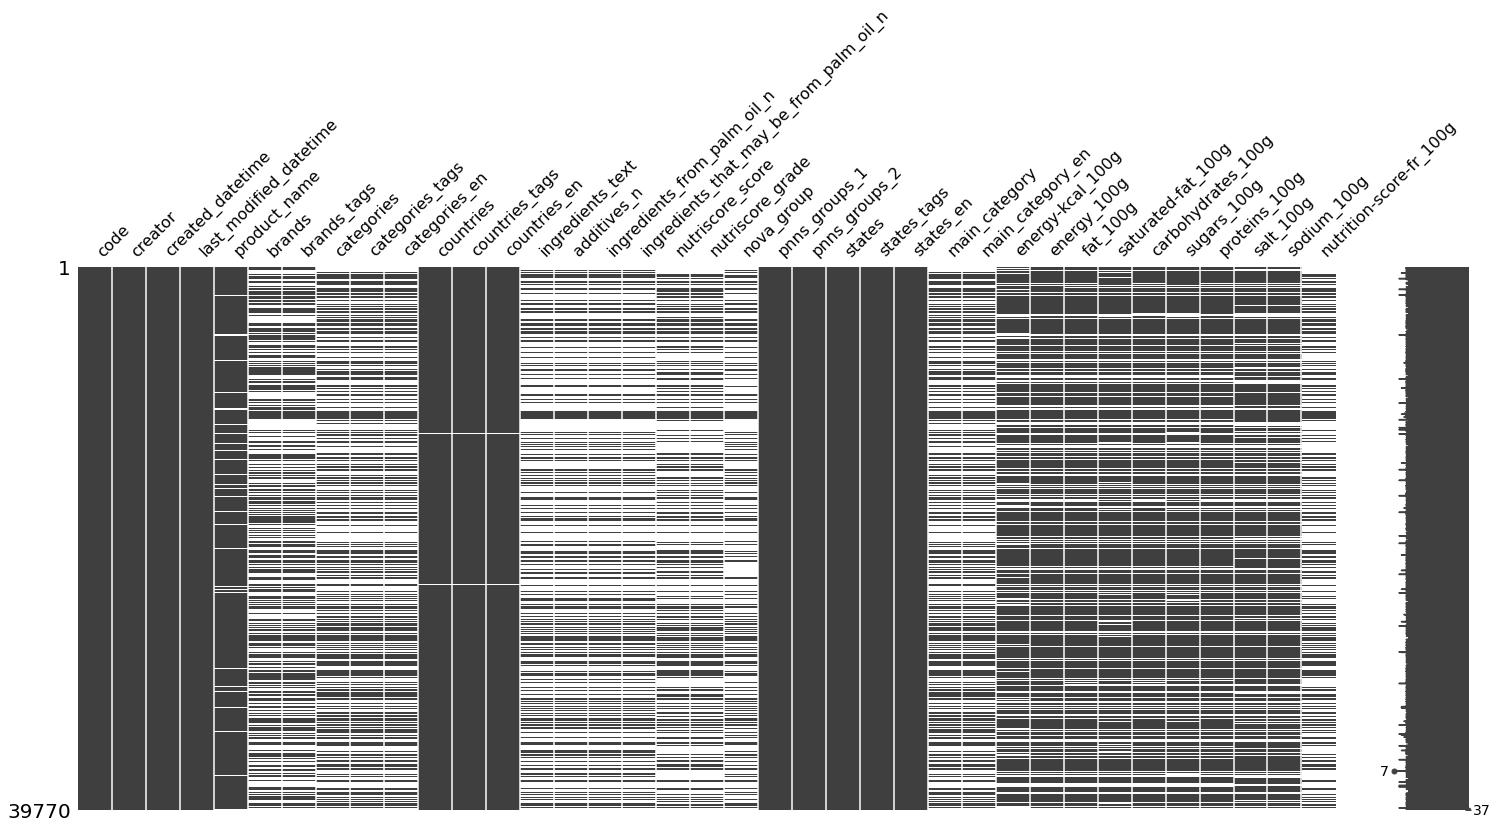

In [23]:
msno.matrix(df.sample(round(df.shape[0]*0.02)))

In [24]:
df.columns.size

37

## Conclusion

Now we have a dataset with 37 remaining columns, which have at least 70% of data filled in each. 

Only 3 kind of types exists.

We can start analysing the values, in a consistent way


# ANALYSIS

![](assets/SEO-analysis.jpg)

## Outliers analysis

In [25]:
for col in df.select_dtypes('float').columns:
    print(col)

additives_n
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
nutriscore_score
nova_group
energy-kcal_100g
energy_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
proteins_100g
salt_100g
sodium_100g
nutrition-score-fr_100g


In [26]:
pd.options.display.float_format = '{:.2f}'.format
df.select_dtypes('float').agg(["min", "max", "median", "mean", "var", "std", "skew", "kurtosis"]).T

(apply_list_of_funcs pid=568760) 


min                max  median  \
additives_n                                0.00              49.00    1.00   
ingredients_from_palm_oil_n                0.00               3.00    0.00   
ingredients_that_may_be_from_palm_oil_n    0.00               6.00    0.00   
nutriscore_score                         -15.00              40.00   10.00   
nova_group                                 1.00               4.00    4.00   
energy-kcal_100g                           0.00 100000000376832.00  260.00   
carbohydrates_100g                        -1.00          762939.00   15.10   
sugars_100g                               -1.00 100000000376832.00    3.57   
proteins_100g                           -500.00           73000.00    6.00   
salt_100g                                  0.00           75000.00    0.57   
sodium_100g                                0.00           30000.00    0.23   
nutrition-score-fr_100g                  -15.00              40.00   10.00   

                                               mean                       var  \
additives_n                                    2.03                      8.41   
ingredients_from_palm_oil_n                    0.02                      0.02   
ingredients_that_may_be_from_palm_oil_n        0.07                      0.09   
nutriscore_score                               9.10                     78.18   
nova_group                                     3.42                      0.95   
energy-kcal_100g                        71277250.65 6601771003401592635392.00   
carbohydrates_100g                            28.86                 400567.09   
sugars_100g                             64364533.49 6436451992991759859712.00   
proteins_100g                                  8.79                   3953.17   
salt_100g                                      2.13                   8850.42   
sodium_100g                                    0.85                   1415.26   
nutrition-score-fr_100g                        9.10                     78.18   

[15 rows x 8 columns]

In [27]:
# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# df_zscore = (df['energy_100g'] - df['energy_100g'].mean())/df['energy_100g'].std()

In [28]:
# df_bck[df_bck['energy_100g'] == df_bck['energy_100g'].max()].T

<function matplotlib.pyplot.show(close=None, block=None)>

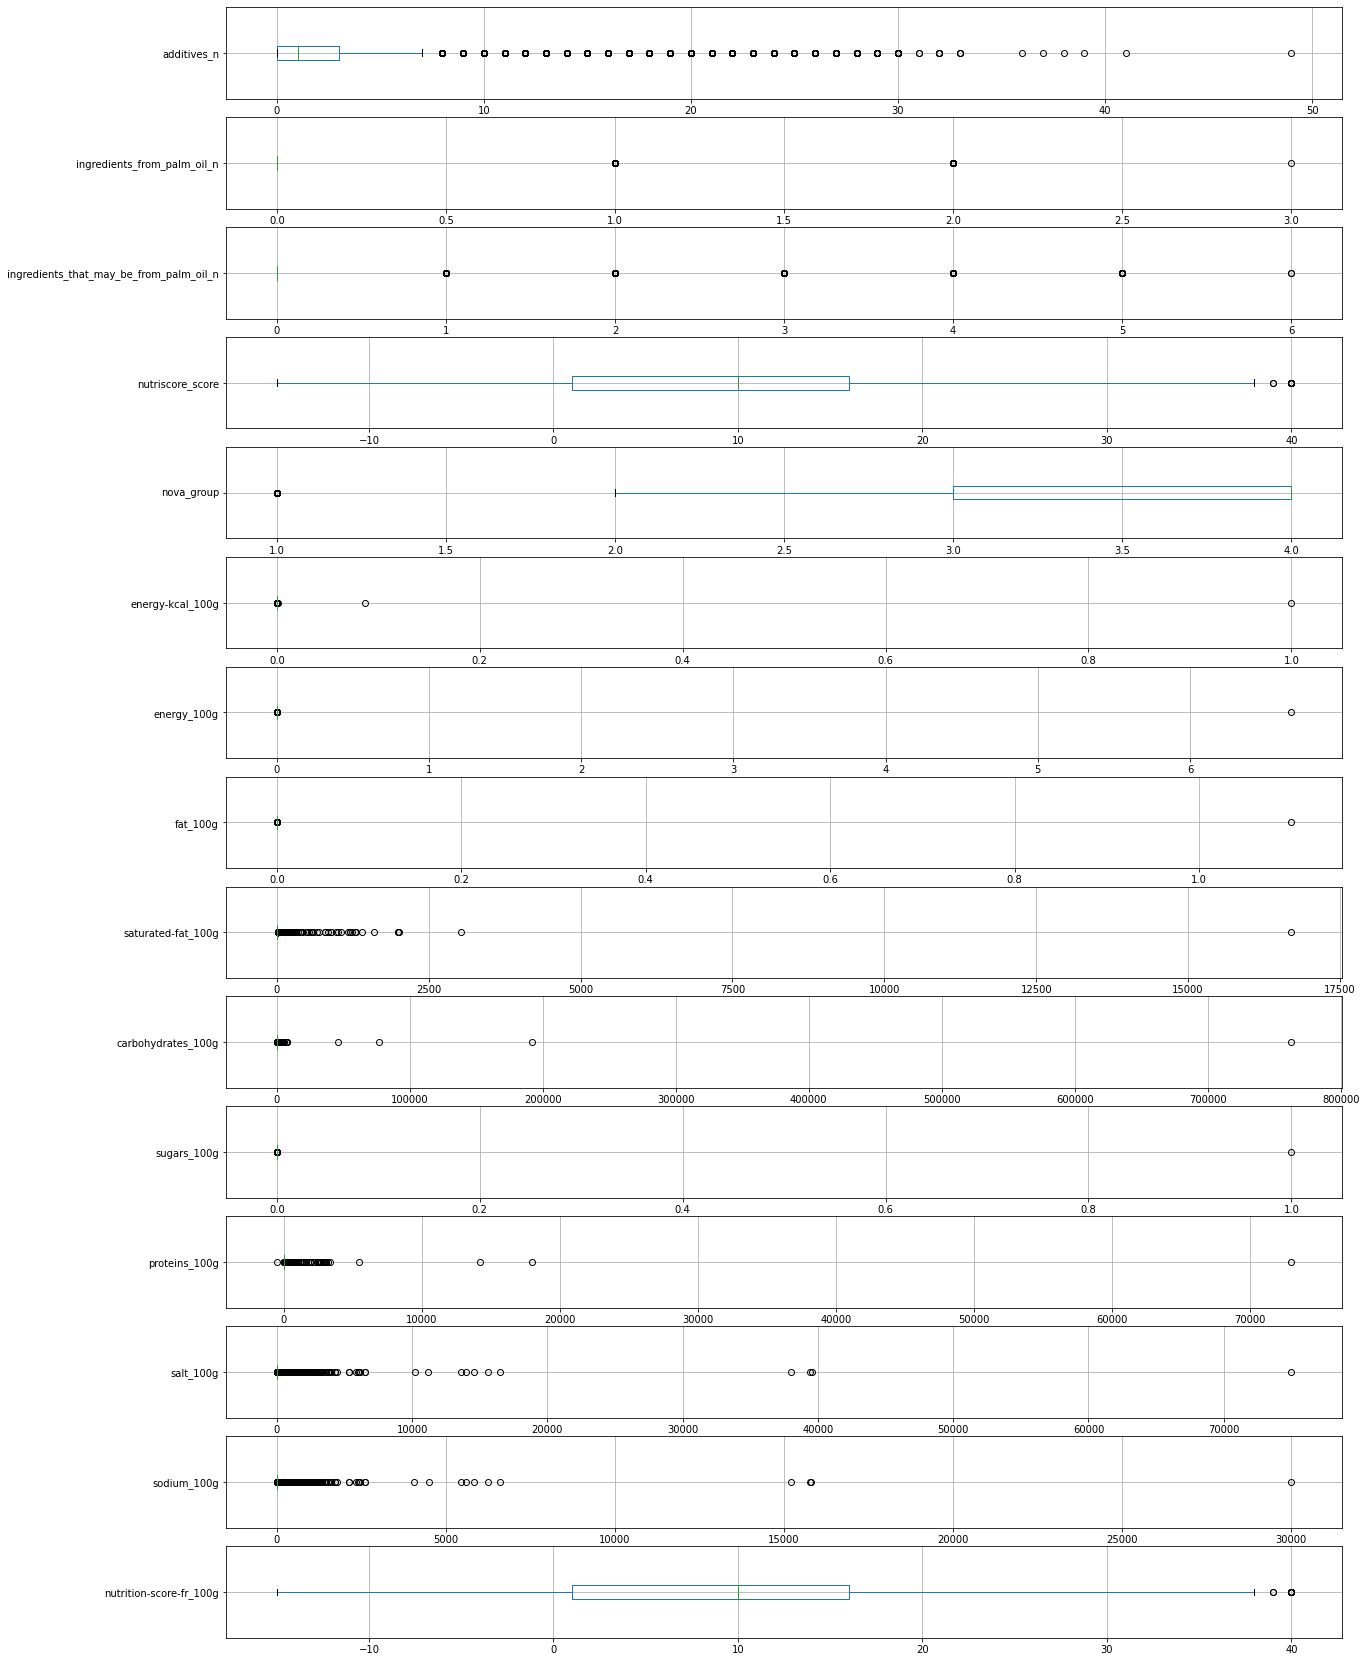

In [29]:
size = df.select_dtypes('float').columns.size
plt.figure(figsize=(20,30))
for i, col in enumerate(df.select_dtypes('float')):
    plt.subplot(size, 1, i+1)
    df.boxplot(column=col, vert=False)
plt.show

We see that:

| Feature | Comment |
|:-----|:-----|
| additives_n | lots of outliers above 8 |
| ingredients_from_palm_oil_n | just fex values (1, 2, 3) |
| ingredients_that_may_be_from_palm_oil_n | just few values (1, 2, 3, 4, 5, 6) |
| nutriscore_score | distribution to investigate |
| nova_group | distribution to investigate |
| energy-kcal_100g | two outliers above 0.1 |
| energy_100g | one outlier above 6 |
| fat_100g | one outlier above 1 |
| saturated-fat_100g | lots of outliers, need to refine |
| carbohydrates_100g | outliers above ~50000 |
| sugars_100g | one outlier above 0.1 |
| proteins_100g | lots of outliers above 5000 |
| salt_100g | lots of outliers above 2000 |
| sodium_100g | lots of outliers above ~2500 |
| nutrition-score-fr_100g | distribution to investigate |


<function matplotlib.pyplot.show(close=None, block=None)>

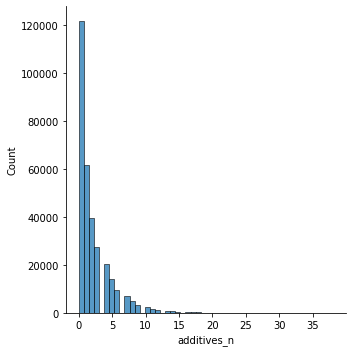

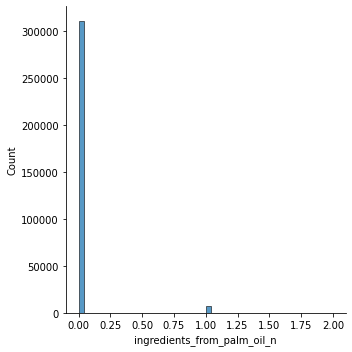

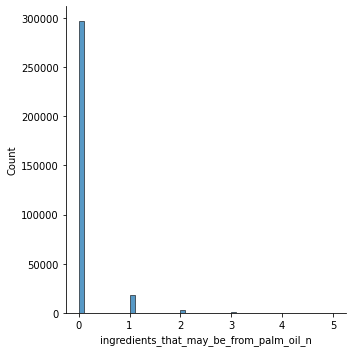

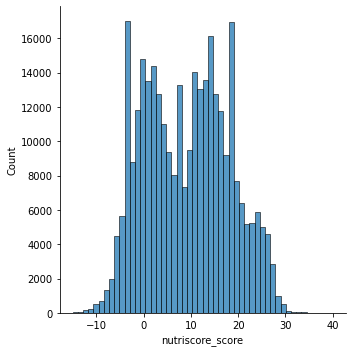

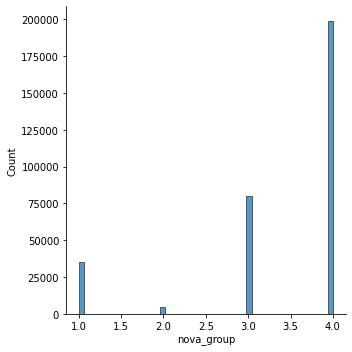

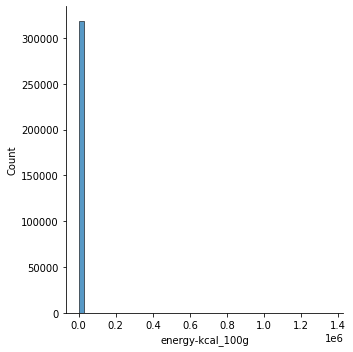

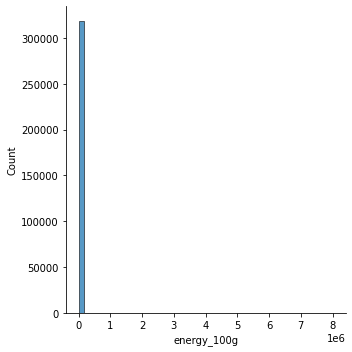

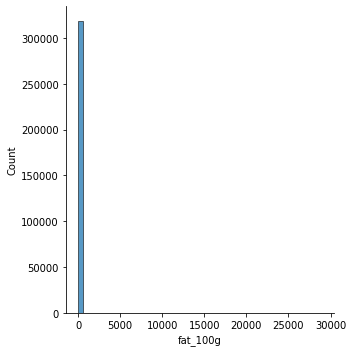

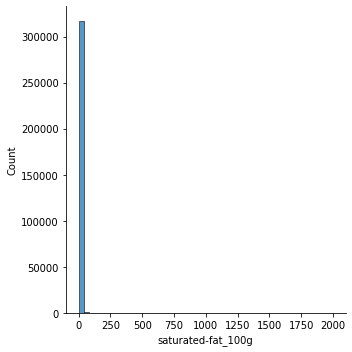

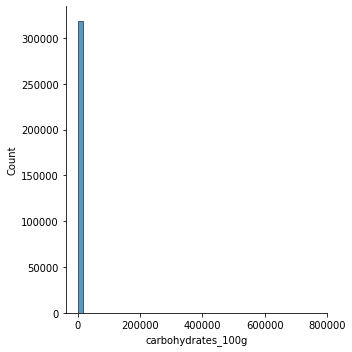

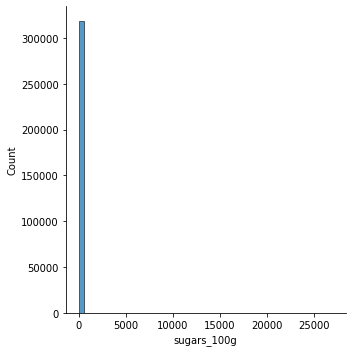

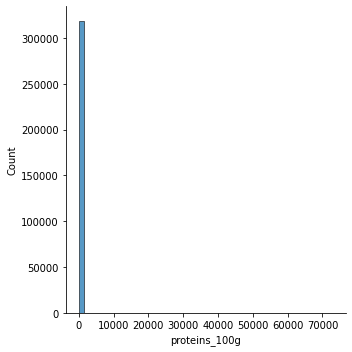

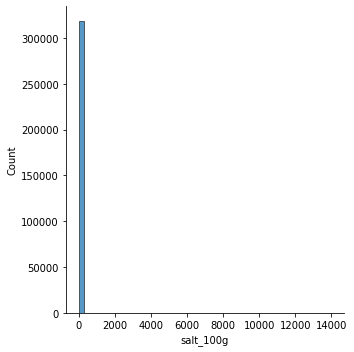

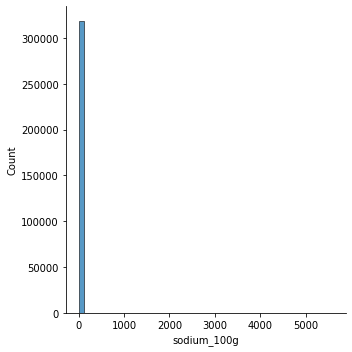

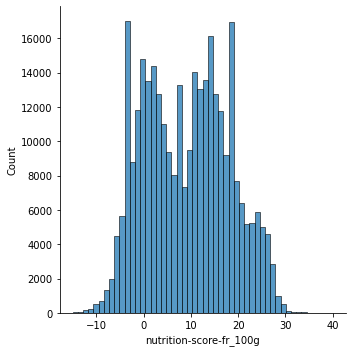

In [30]:
tmp_df = df.dropna()
size = tmp_df.select_dtypes('float').columns.size
for i, col in enumerate(df.select_dtypes('float')):
    sns.displot(tmp_df, x=col, bins=50)
plt.show

In [31]:
# df.loc[:, 'energy-kcal_100g'].isnull()
for i, col in enumerate(df.select_dtypes('float')):
    print(f"{(df.loc[:,col].fillna(float(0)) == 0).mean()}")

additives_n   0.79
dtype: float64
ingredients_from_palm_oil_n   0.99
dtype: float64
ingredients_that_may_be_from_palm_oil_n   0.98
dtype: float64
nutriscore_score   0.66
dtype: float64
nova_group   0.68
dtype: float64
energy-kcal_100g   0.25
dtype: float64
energy_100g   0.23
dtype: float64
fat_100g   0.33
dtype: float64
saturated-fat_100g   0.40
dtype: float64
carbohydrates_100g   0.27
dtype: float64
sugars_100g   0.34
dtype: float64
proteins_100g   0.31
dtype: float64
salt_100g   0.37
dtype: float64
sodium_100g   0.37
dtype: float64
nutrition-score-fr_100g   0.66
dtype: float64


Correlation btw 'nutriscore_score' and 'additives_n'

'contingency table'


In [32]:
pd.crosstab(df['nutriscore_score'], df['additives_n'], dropna=True )

col_0   0.00   1.00   2.00   3.00   4.00   5.00   6.00   7.00   8.00   9.00   \
row_0                                                                          
-15.00      3      0      0      0      0      0      0      0      0      0   
-14.00     65      5      2      0      0      0      0      0      0      0   
-13.00    149      2      2      1      0      0      0      0      0      0   
-12.00    253      7      1      0      2      0      0      0      0      0   
-11.00    330     15      4      1      0      0      0      0      0      0   
-10.00    756     67     24      8      0      1      0      1      0      0   
35.00       7      6      4      2      2      3      3      0      1      0   
36.00       6      5      3      1      0      0      0      0      0      0   
37.00       3      1      1      0      0      0      0      0      0      0   
38.00       0      1      0      0      3      0      0      0      0      0   
39.00       1      0      0      0      0      0      0      0      0      0   
40.00       4      2      0      1      0      0      0      0      0      0   

col_0   ...  27.00  28.00  29.00  30.00  31.00  32.00  33.00  36.00  38.00  \
row_0   ...                                                                  
-15.00  ...      0      0      0      0      0      0      0      0      0   
-14.00  ...      0      0      0      0      0      0      0      0      0   
-13.00  ...      0      0      0      0      0      0      0      0      0   
-12.00  ...      0      0      0      0      0      0      0      0      0   
-11.00  ...      0      0      0      0      0      0      0      0      0   
-10.00  ...      0      0      0      0      0      0      0      0      0   
35.00   ...      0      0      0      0      0      0      0      0      0   
36.00   ...      0      0      0      0      0      0      0      0      0   
37.00   ...      0      0      0      0      0      0      0      0      0   
38.00   ...      0      0      0      0      0      0      0      0      0   
39.00   ...      0      0      0      0      0      0      0      0      0   
40.00   ...      0      0      0      0      0      0      0      0      0   

col_0   39.00  
row_0          
-15.00      0  
-14.00      0  
-13.00      0  
-12.00      0  
-11.00      0  
-10.00      0  
35.00       0  
36.00       0  
37.00       0  
38.00       0  
39.00       0  
40.00       0  

[56 rows x 37 columns]

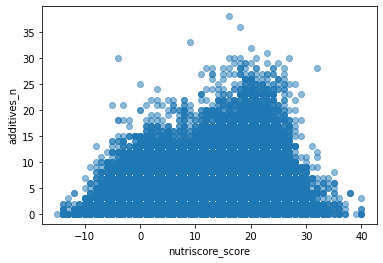

In [33]:
tmp_df = df.dropna()
plt.scatter(tmp_df['nutriscore_score'], tmp_df['additives_n'], alpha=0.5)
plt.xlabel('nutriscore_score')
plt.ylabel('additives_n')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

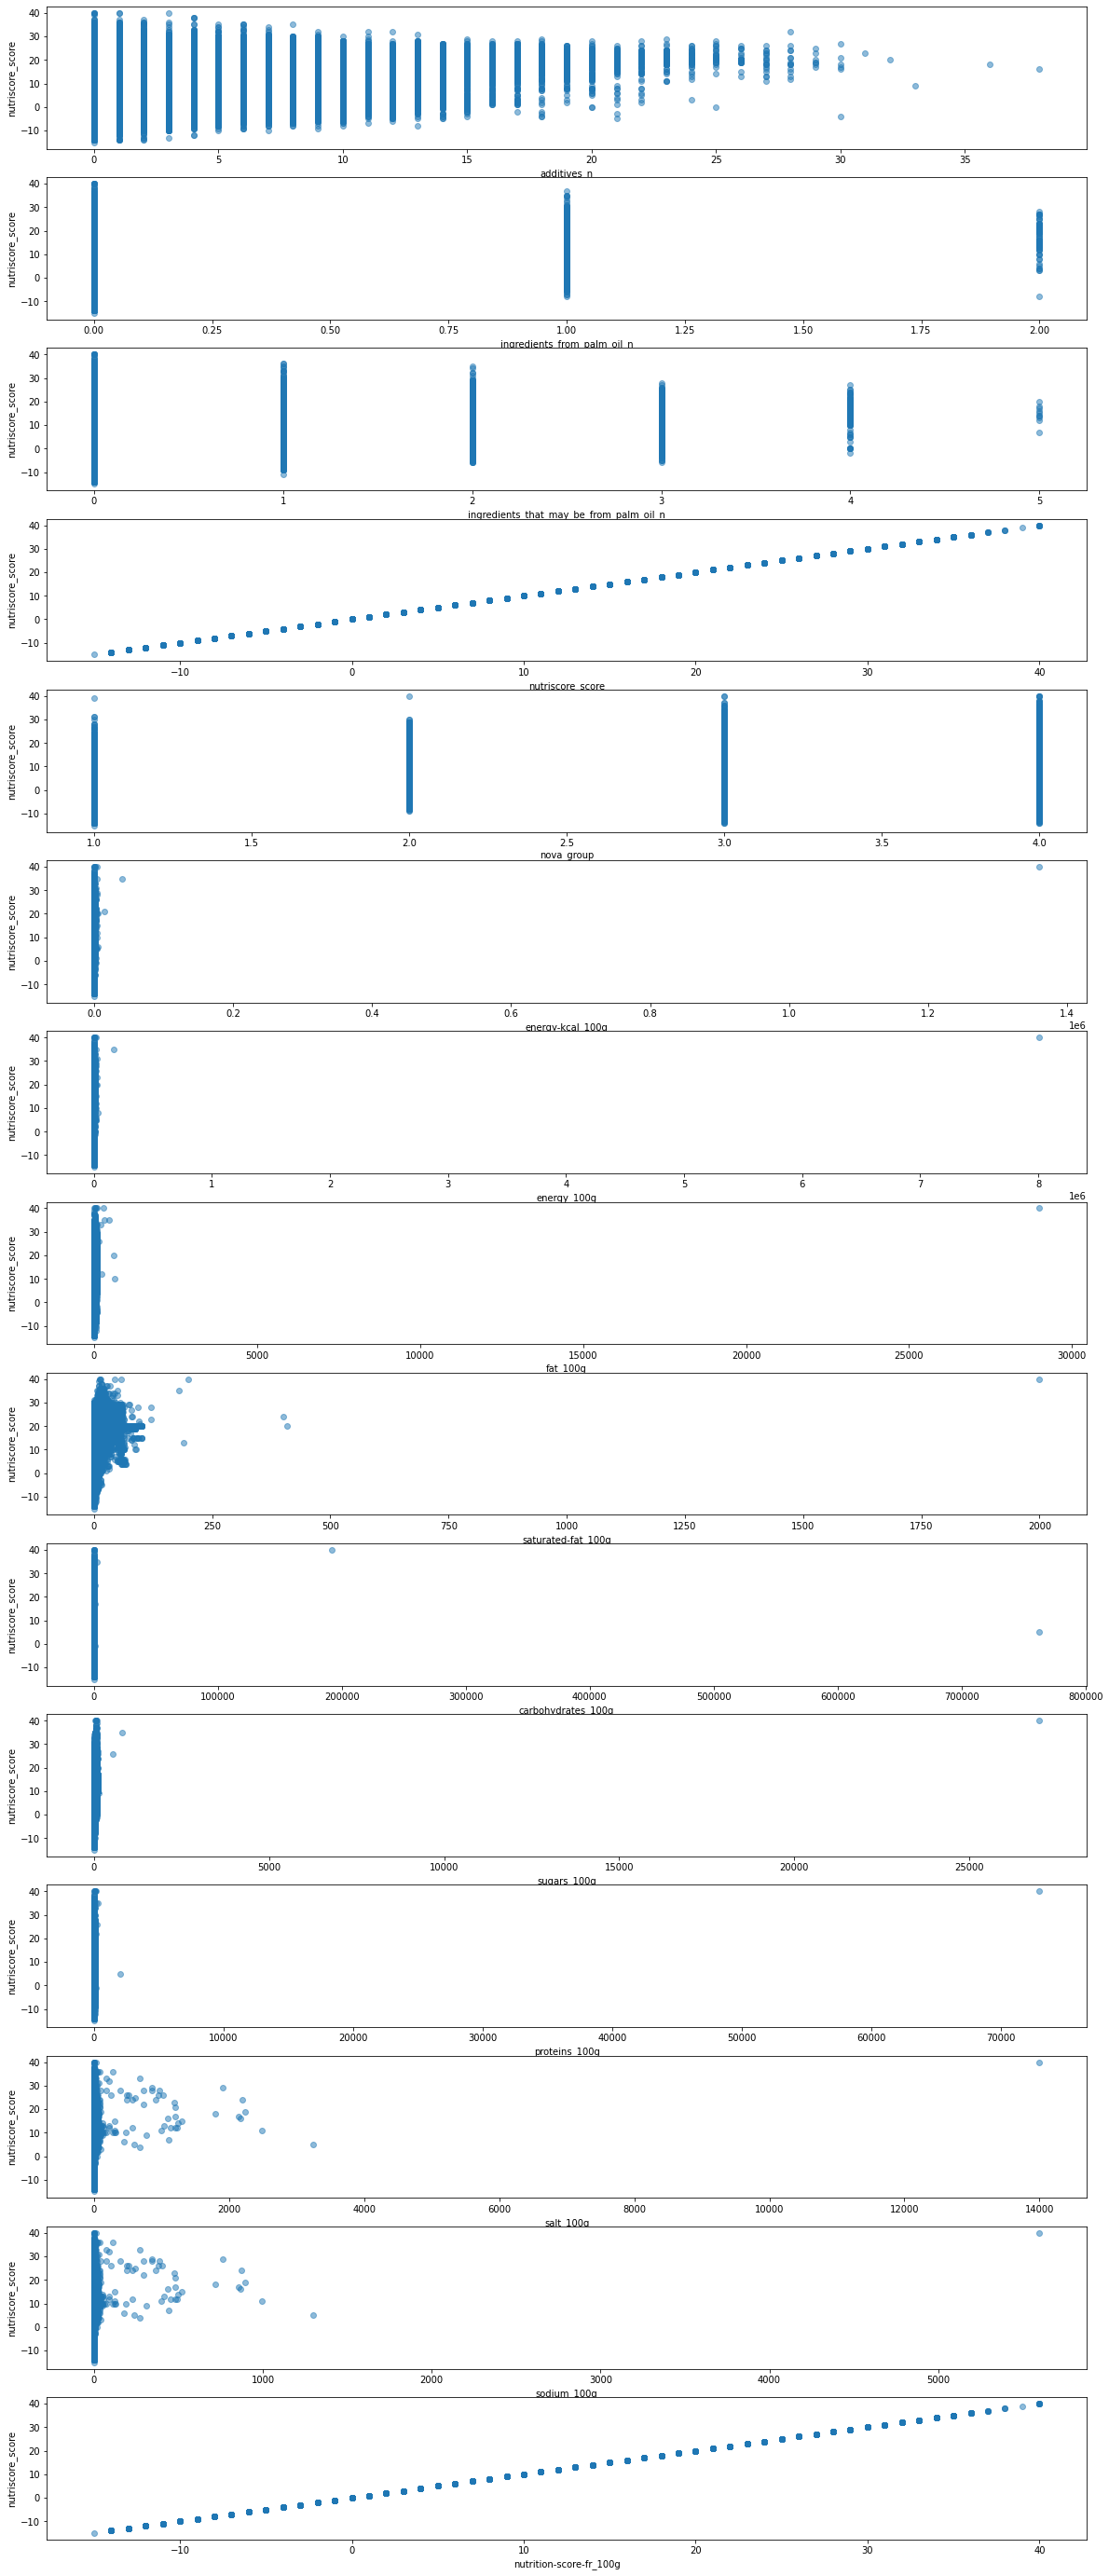

In [34]:
tmp_df = df.dropna()
plt.figure(figsize=(20,50))
size = tmp_df.select_dtypes('float').columns.size
for i, col in enumerate(df.select_dtypes('float')):
    plt.subplot(size, 1, i+1)
    plt.scatter(tmp_df[col], tmp_df['nutriscore_score'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('nutriscore_score')
plt.show

This feature has a multi modal distribution

## Qualitative Values

With a pre-filtered dataset. 

Let's look at the qualitative values, which ones are of interest


### dispertion of values

Let's show object features with their unique values : we are looking for features that contains just a few values, otherwise this is not interesting

In [35]:
df.columns[df.dtypes == 'object']

Index(['code', 'creator', 'product_name', 'brands', 'brands_tags',
       'categories', 'categories_tags', 'categories_en', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'states',
       'states_tags', 'states_en', 'main_category', 'main_category_en'],
      dtype='object')

In [36]:
df['categories'].mode()

0    Snacks
Name: categories, dtype: object

In [37]:
df['countries_tags'].mode()

0    en:france
Name: countries_tags, dtype: object

We remove the columns with a higher percentage of not unique values, because they will result in a too big variance

So, we should only keep:

countries_en, additives_tags, nutriscore_grade, pnns_groups_1,pnns_groups_2,ecoscore_grade_fr,

## Quantitative Values

### Empirical Variance (Variance Empirique)

$ \upsilon = \frac{1}{n} \sum_{i=1}^n(x_i - \bar{x})¬≤$

### Standard Deviation (Ecart-Type Empirique)

$ s = \sqrt{\upsilon} $ 


In [38]:
for col in df.select_dtypes('object'):
    print(f'{col} {(df[col].unique().size / df[col].size):.0%}')

code 100%
creator 1%
product_name 62%
brands 9%
brands_tags 7%
categories 6%
categories_tags 4%
categories_en 4%
countries 1%
countries_tags 0%
countries_en 0%
ingredients_text 31%
nutriscore_grade 0%
pnns_groups_1 0%
pnns_groups_2 0%
states 0%
states_tags 0%
states_en 0%
main_category 2%
main_category_en 2%


In [51]:
pd.crosstab(df['categories'], df['nutriscore_grade'])
# sns.catplot(x='categories', y='nutriscore_grade', data=df)

col_0                                    a  b  c  d  e
row_0                                                 
% de mati√®res grasses                    0  2  0  1  0
0                                        0  3  1  0  0
05 PP                                    1  0  0  0  0
1                                        2  1  2  0  0
1% Low Fat Milk with Added Milk Protein  1  0  0  0  0
10                                       0  1  1  0  0
ÌååÏä§ÌÉÄÎ©¥                                     1  0  0  0  0
ÌïúÍ≥º                                       0  0  1  0  0
ÌñÑ                                        0  0  0  0  1
ùò£ùò∞ùò≠ùò≠ùò¶ùò≥ùò™ùò¢                                 0  0  0  1  0
üçû                                        0  1  0  0  0
ü§¨                                        0  0  0  0  1

[85983 rows x 5 columns]

In [74]:
tmp_df = df.loc[:,'countries'].fillna("")
tmp_df2 = tmp_df.loc[tmp_df['countries'].str.contains("France", case=False)]
tmp_df2

countries
0        en:france
2           France
3           France
6           France
7        en:France
8           France
1988459     France
1988465     France
1988468     France
1988472  en:france
1988474  en:france
1988475     France

[580613 rows x 1 columns]

In [61]:
pd.crosstab(df['countries'], df['nutriscore_grade'])


col_0                               a  b  c  d  e
row_0                                            
Afganist√°n,Francia,Alemania,Espa√±a  0  0  0  0  1
Afganist√°n,Francia,Espa√±a           0  1  0  0  0
Afghanistan,Belgique,France         0  0  0  0  1
Afghanistan,France                  2  3  5  3  1
Afghanistan,France,R√©union          0  0  1  0  0
Afghanistan,Frankreich,Deutschland  0  0  0  0  1
Ë•øÁè≠Áâô                                 0  0  0  1  0
È¶ôÊ∏Ø                                  0  4  1  3  0
È¶ôÊ∏Ø, ‰∏≠ËèØÊ∞ëÂúã                            0  0  0  1  0
ÎåÄÌïúÎØºÍµ≠                                1  2  0  4  4
ÌîÑÎûëÏä§                                 1  0  1  0  0
ÌîÑÎûëÏä§,ÎèÖÏùº                              0  0  0  1  0

[8156 rows x 5 columns]

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.select_dtypes('object').agg(["min", "max", "median", "mean", "var", "std", "skew", "kurtosis"]).T

## Resulting Dataset

We can see that some columns still have lots of empty values, but also that several rows have almost (or all) the features provided,
which is good for further analysis

In [ ]:
# show heatmap : commented out since uses lots of resources, replaced by missingno
# plt.figure(figsize=(20,10))
# sns.heatmap(df.isna(), cbar=False)

# TODO

continuer √† nettoyer le dataset

### 1. formater les categories en lowercase, splitter les tags (one hot ?)

tip : `.apply(fct)` existe en python, ex: `data['taille'] = data['taille'].apply(convert_height)`

### 2. analyser les outliers

### 3. approffondir la distribution des quali et quanti [cours](https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4742171-representez-la-distribution-empirique-dune-variable) 

### 4. discretiser les variables continues

> Le fait d'agr√©ger une variable s'appelle la discr√©tisation (en anglais : binning, bucketing ou discretization).

empirical cumulative distribution function ([ecdf](https://machinelearningmastery.com/empirical-distribution-function-in-python/)) Dans le cas d'une variable qui ne suit pas une loi normale => est-ce le cas dans ce dataset ?

$ F_{emp}(x)=\frac{1}{n}\sum_{i=1}^{n}I_{\{{x_{i}} \leq x\}}$ 

o√π I est la fonction indicatrice. 1 si xi <= x, 0 sinon
    
code samples from course: 

```python
import matplotlib.pyplot as plt

# VARIABLE QUALITATIVE
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plut√¥t qu'une √©llipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

# VARIABLE QUANTITATIVE
# Diagramme en b√¢tons
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

# Histogramme
data["montant"].hist(density=True)
plt.show()
# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()
```

### 5. faire le nombre et la fr√©quence des valeurs quali (pour toutes celles retenues dans le dataset)

```python
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalit√©s

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # cr√©ation du tableau √† partir des modalit√©s
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'√©chantillon
```

> modalit√©
>
> effectif
>
> fr√©quence
>
> variable qualitative ordinale

### 6. reverifier si la suppression des colonnes √† du sens, si ce n'est pas preferable pour certaines de remplir avec une valeur arbitraire (moyenne, autre ...)

### 7. remplacer valeur NaN (`fillna`)

### 8. resample dataset ?
pour diminuer la taille et faciliter les calculs ?  `sklearn.utils.resample`

### 9. Analyse ANOVA

correlation entre variables



## Analysis

In [ ]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_1'] )

In [ ]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_2'] )

In [ ]:
plt.figure(figsize=(20,20))
# sns.displot(df, x='nutriscore_grade')
sns.displot(df, x='nutriscore_score', hue='nutriscore_grade', kind='ecdf')
plt.savefig("nutriscore_grade_multivariate_analysis.png", format='png', dpi=150)
sns.displot(df, x='nutriscore_score', y='ecoscore_score_fr', hue='nutriscore_grade')
# sns.displot(df, x='nutriscore_score', y= 'nova_group', hue='nutriscore_grade', kind='kde')
# sns.displot(df, x='nutriscore_score', col='nutriscore_grade')
plt.savefig("nutriscore_ecoscore_multivariate_analysis.png", format='png', dpi=150)

In [ ]:
df['nutriscore_grade'].value_counts(normalize=True).plot.pie()

In [ ]:
df['nutriscore_score'].dropna().value_counts().sort_values(ascending=False)


We can see that some columns still have lots of empty values, but also that several rows have almost (or all) the features provided,
which is good for further analysis



In [ ]:
# most filled features
df.columns[[0, 1, 11, 12, 13, 25, 26, 27, 28, 29]]

In [ ]:
df.columns.get_loc('nutriscore_grade')

2021-11-04 22:28:34,538	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,541	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,544	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,548	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,552	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,554	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,558	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,561	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,564	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,566	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,569	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3

2021-11-04 22:28:34,571	ERROR worker.py:79 -- Unhandled error (suppress with RAY_IGNORE_UNHANDLED_ERRORS=1): ray::deploy_ray_func() (pid=568773, ip=192.168.0.23)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/ray/pandas_on_ray/frame/axis_partition.py", line 207, in deploy_ray_func
    result = func(*args)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/axis_partition.py", line 303, in deploy_axis_func
    result = func(dataframe, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/engines/base/frame/data.py", line 1153, in _map_reduce_func
    series_result = func(df, *args, **kwargs)
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3.9/site-packages/modin/backends/pandas/query_compiler.py", line 2448, in <lambda>
    lambda df: pandas.DataFrame(df.apply(func, axis, *args, **kwargs)),
  File "/home/vincent/devel/vjuge/oc-iml/venv/lib64/python3